# Auto-graded section

The block below imports the necessary packages.

In [5]:
import numpy as np
import pandas as pd

## 1. MNIST Dataset (30 pts)

### 1a: Reading in the dataset (10 pts)

Load the MNIST data from `sklearn.datasets`. Save the pixel data to `X_mnist` (numpy.array) and the corresponding numbers to `y_mnist` (numpy.array).

In [6]:
########################################
# Start your code here
from sklearn.datasets import load_digits

digits = load_digits()
X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)
########################################

In [ ]:
assert X_mnist.shape == (1797, 64), "Wrong data"
assert y_mnist.shape == (1797,), "Wrong data"
assert X_mnist[0].sum() == 294.0, "Wrong data"
assert np.isclose(X_mnist[y_mnist == 9].mean(), 4.895138888888889), "Wrong data"

### 1b: Correlation matrix (10 pts)

Create the correlation matrix `corr` for the 9th to 12th features in the `X_mnist` data. The resulting matrix should be a 4 x 4 matrix.

In [ ]:
########################################
# Start your code here
corr = np.corrcoef(X_mnist[:, 8:12].T)
########################################

In [ ]:
assert corr.shape == (4, 4), "Wrong dimensions"
assert np.isclose(np.linalg.norm(corr), 2.181790276103041), "Wrong correlation matrix"

### 1c: Standardize the features (5 pts)

Standardize the 9th to 12th features in the `X_mnist` data and save them to `X_mnist_scaled`.

In [ ]:
########################################
# Start your code here
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_mnist_scaled = ss.fit_transform(X_mnist[:, 8:12])
########################################

In [ ]:
assert np.isclose(X_mnist_scaled.mean(), 0), "not standardized"
assert np.isclose(X_mnist_scaled.std(), 1), "not standardized"
assert np.isclose(np.linalg.norm(X_mnist_scaled), 84.78207357690678), "wrong features"

### 1d: Correlation and regression I (2.5 pts)

The correlation between two given features is numerically equivalent to the regression slope between the standardized features. Let's show this with a simple coding exercise:

- Get the correlation between 9th and 11th features from `corr` and save it to `corr_9_11`.
- Declare `LinearRegression(fit_intercept = False)` and train the model with the 9th and 11th features as x data and y data, respectively.
- Get the regression slope `slope_9_11` from the `LinearRegression` model.
- The autograder will test if `corr_9_11` and `slope_9_11` are identical to each other.

In [ ]:
########################################
# Start your code here
corr_9_11 = corr[0][2]

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = False)

lr.fit(X_mnist_scaled[:, 0].reshape(-1, 1), X_mnist_scaled[:, 2].reshape(-1, 1))
slope_9_11 = lr.coef_[0][0]
########################################

In [ ]:
assert np.isclose(corr_9_11, 0.04161298355604604), "wrong correlation"
assert np.isclose(corr_9_11, slope_9_11), "wrong regression slope"

### 1e: Correlation and regression II (2.5 pts)

The value of correlation squared is numerically equivalent to the $\mathrm{r^2}$ score of a regression model between the two standardized features. You will also show this with a simple coding exercise:

- Get the squared-value of correlation between 10th and 12th features from `corr` and save it to `corr_10_12`.
- Decaler `LinearRegression(fit_intercept = False)` and train the model with the 10th and 12th features as x data and y data, respectively.
- Get the $\mathrm{r^2}$ `r2_10_12` from the `LinearRegression` model.
- The autograder will test if `corr_10_12` and `r2_10_12` are identical to each other.

In [ ]:
########################################
# Start your code here
corr_10_12 = corr[1][3]**2

lr.fit(X_mnist_scaled[:, 1].reshape(-1, 1), X_mnist_scaled[:, 3].reshape(-1, 1))
r2_10_12 = lr.score(X_mnist_scaled[:, 1].reshape(-1, 1), X_mnist_scaled[:, 3].reshape(-1, 1))
########################################

In [ ]:
assert np.isclose(corr_10_12, 0.06455652711795277), "wrong correlation"
assert np.isclose(corr_10_12, r2_10_12), "wrong r2 score"

## 2. Kernel PCA (20 pts)

Kernel PCA utilizes the eigenvalues and corresponding eigenvectors of a given kernel matrix. Let's make use of the built-in `KernelPCA` module in `scikit-learn` package.

### 2a: Import `KernelPCA` (10 pts)

Import the `KernelPCA` class from `sklearn.decomposition`.

In [ ]:
########################################
# Start your code here
from sklearn.decomposition import KernelPCA
########################################

In [ ]:
assert KernelPCA.__init__, "KernelPCA not imported"

### 2b: Set the kernel matrix (5 pts)

`KernelPCA` object takes `kernel` parameter that defines a kernel that is used for the following PCA. The default option is a `linear` kernel, while, in this problem, you will use a `rbf` kernel which you are very familiar with. Declare a `KernelPCA` object `kpca` with `kernel = 'rbf'`. You do not need to specify any other arguments for this problem.

In [ ]:
########################################
# Start your code here
kpca = KernelPCA(kernel = 'rbf')
########################################

In [ ]:
assert kpca.kernel == 'rbf', "wrong kernel"

### 2c: Eigenvalues (2.5 pts)

Project the `X_mnist` data using `kpca` and save the resulting matrix to `X_mnist_kpca` (you do not need to do any dimensional reduction). Get the eigenvalues of the kernel matrix. It would be helpful to refer to the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html). Report the number of eigenvalues obtained from `kpca` as `num_eigvals`.

In [ ]:
########################################
# Start your code here
X_mnist_kpca = kpca.fit_transform(X_mnist)
num_eigvals = kpca.eigenvalues_.shape[0]
########################################

In [ ]:
assert X_mnist_kpca.shape == (1797, 1796), "wrong kernel pca"
assert np.isclose(kpca.eigenvalues_[0], 2.3481557275070606), "wrong kernel pca"
assert np.isclose(num_eigvals * kpca.eigenvalues_[1], 3532.6854240142975), "wrong num_eigvals"

### 2d: kPCA Dimensional Reduction (2.5 pts)

Use kernel PCA to project the dataset onto the first two principal components of the kernel PCA matrix. Save the resulting dataset as `X_kpca_2d`.

**Hint:** You may need to re-initialize your KernelPCA class.

In [ ]:
########################################
# Start your code here
X_kpca_2d = X_mnist_kpca[:, :2]
########################################

In [ ]:
assert X_kpca_2d.shape == (1797, 2), "dimensionality of projection is not correct"
assert np.isclose(np.linalg.norm(X_kpca_2d), 2.0772890492972254), "projection is not correct"

# Peer-graded section

For this section of the homework, we will use the dataset loaded in the previous section.

In [1]:
import pylab as plt
import seaborn as sns

The function below is a useful way to visualize a datapoint in the MNIST dataset.

In [2]:
def show_image(digit_data, n, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    img = digit_data[n].reshape(8,8)
    colormap = ax.imshow(img, cmap='binary', vmin=0, vmax=16)
    ax.get_figure().colorbar(colormap, ax=ax)

## 1. Low-dimensional Representation

In this problem, you will play with low-dimensional representations obtained from PCA and their reconstructed data using the MNIST data imported above. The below are the requirements:

- Use PCA to project the MNIST data onto 32 dimensions.
- Select the points labeled as the number 8.
- Take the average of these points.
- Project the resulting average vector back to the 64-D space.
- Create a 1x2 subplot (code provided).
- On the left plot, visualize any one data point labeled as 8 as an 8x8 image.
- On the right plot, visualize the reconstructed vector as an 8x8 image.

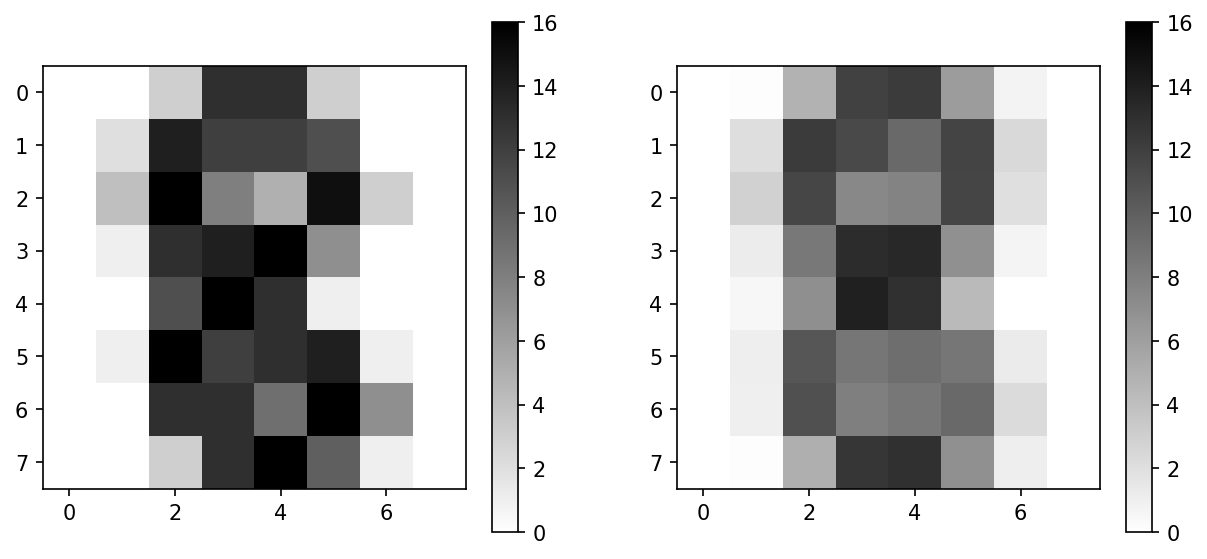

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi =150)

from sklearn.decomposition import PCA

pca = PCA(n_components = 32)
X_pca = pca.fit_transform(X_mnist)

X_pca_8_mean = X_pca[y_mnist == 8].mean(axis = 0)
X_reconstructed = pca.inverse_transform(X_pca_8_mean).reshape(1, -1)

show_image(X_mnist[y_mnist == 8], 14, ax = axes[0])
show_image(X_reconstructed, 0, ax = axes[1])

Repeat the same process, but project the data onto 10 dimensions in this case.

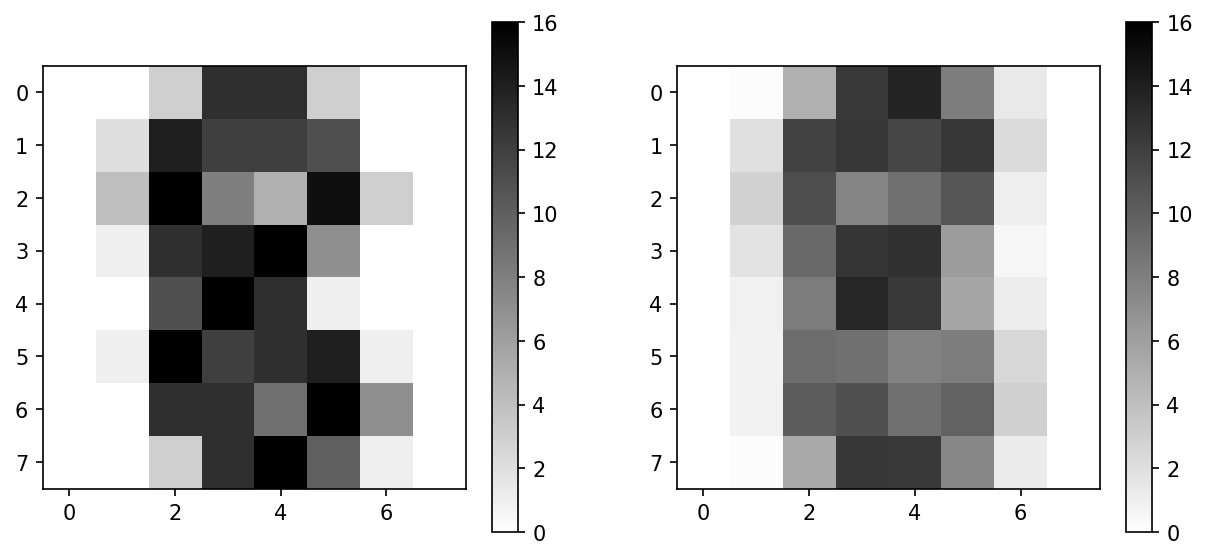

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi =150)

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_mnist)

X_pca_8_mean = X_pca[y_mnist == 8].mean(axis = 0)
X_reconstructed = pca.inverse_transform(X_pca_8_mean).reshape(1, -1)

show_image(X_mnist[y_mnist == 8], 14, ax = axes[0])
show_image(X_reconstructed, 0, ax = axes[1])

In which case does the reconstructed data look closer to the original image? Briefly discuss why.

**Answer**

There is no such difference between the two reconstructed images. One possible reason is that the first few principal components already contain most of the important information of original images.

## 2. Kernel PCA projection

When dealing with high-dimensional data, it is often useful to visualize the data onto 2 dimensional space, although we may lose some information by doing so. This process will provide us with some insights of how the dataset looks like and how we should proceed with it. 

Below, a 1x4 subplot is provided for you. On the far left plot, utilize regular PCA to project the data onto two dimensions. On the middle and right-hand plots, utilize kernel PCA with the `rbf` kernel with three different values of the kernel width. All datapoints should be color-coded by their labels. Set the subfigure title to the value of kernel width that you used.

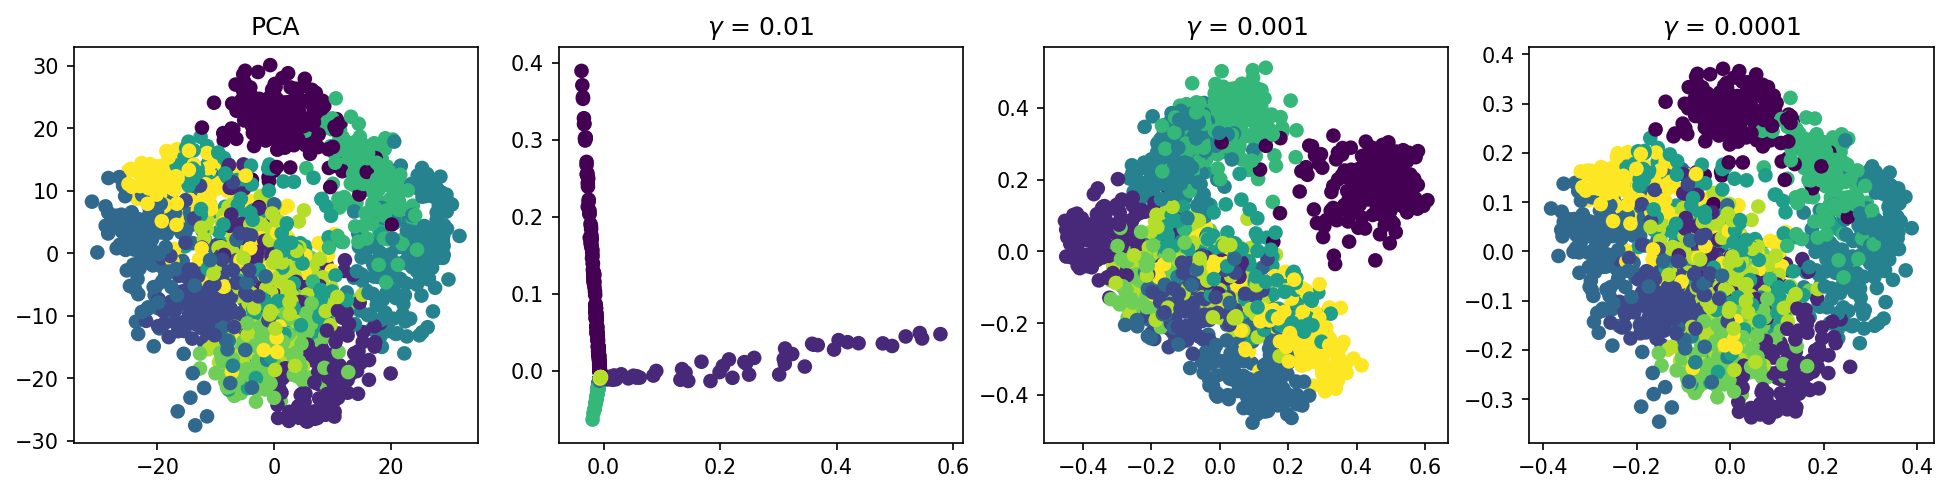

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (16, 3.5), dpi = 150)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_mnist)

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c = y_mnist)
axes[0].set_title('PCA')

from sklearn.decomposition import KernelPCA

gammas = [1e-2, 1e-3, 1e-4]
for i, ax in enumerate(axes[1:]):
    kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = gammas[i])
    X_kpca = kpca.fit_transform(X_mnist)
    
    ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y_mnist)
    ax.set_title(r'$\gamma$ = {}'.format(gammas[i]))

Which of these projections do you think provides the most insight?

**Answer**

KernelPCA(gamma = 1e-3) gives the best separation for digits of 8. As gamma becomes smaller, the KernelPCA gives the same result as the regular PCA while no insights can be found from bigger gamma.

## 3. Comparing dimensional reduction algorithms
PCA is a very common dimensional reduction approach, but many others exist. Each one has different tradeoffs, including non-linear projections, projectability, and invertability.

Below, a 1x3 subplot is provided for you. Choose 3 different dimensional reduction approaches and project the MNIST data onto 2 dimensional space. Visualize the projected data in each subfigure with datapoints color-coded by their labels. Set the subfigure title to the algorithm you've used.

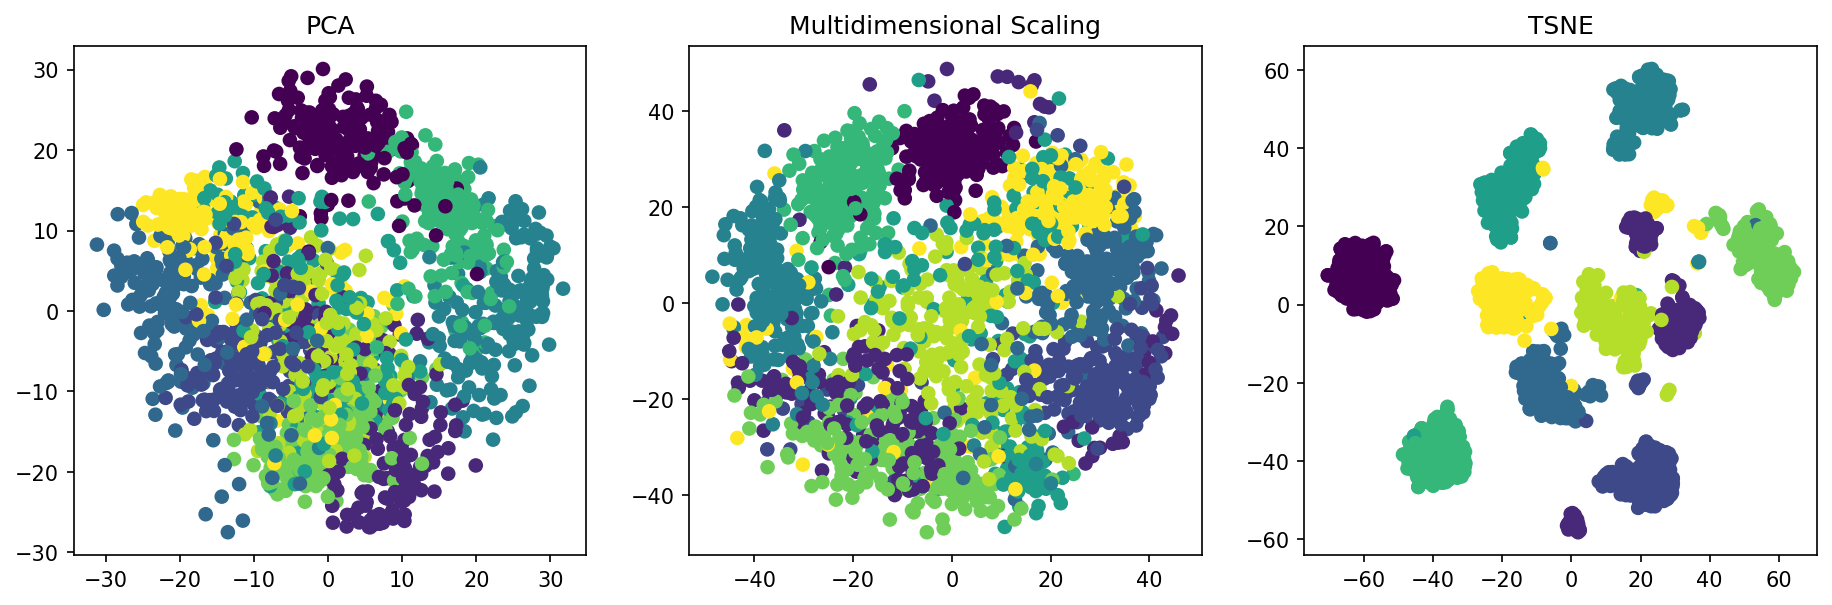

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4.5), dpi = 150)

from sklearn.manifold import MDS, TSNE

algorithms = [PCA(n_components = 2), MDS(n_components = 2), TSNE(n_components = 2)]
title = ['PCA', 'Multidimensional Scaling', 'TSNE']

for i, algorithm in enumerate(algorithms):
    X_alg = algorithm.fit_transform(X_mnist)
    axes[i].scatter(X_alg[:, 0], X_alg[:, 1], c = y_mnist)
    axes[i].set_title(title[i])

For each of the algorithms you selected, note whether it is **projectable** (a new data point can be projected onto the sub-space) and/or **invertable** (high-dimensional data can be re-constructed from the low-dimensional space). 

**Answer**

* PCA: projectable & invertable
* MDS: not projectable & not invertable
* TSNE: not projectable & not invertable